# Regresi Prediksi Harga Rumah

Michael Effendy (F1D022012)

Nazila Imkani (F1D022084)

Wahyuni Sulastri (F1D022101)

Muhammad Fauzan Aqidah (F1D022144)

### Import Library

In [30]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import tensorflow as tf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

### Load Data dan Exploratory Data Analysis

In [2]:
df = pd.read_csv("results_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   house_name      7609 non-null   object 
 1   location        7609 non-null   object 
 2   bedroom_count   7609 non-null   int64  
 3   bathroom_count  7609 non-null   int64  
 4   carport_count   7609 non-null   int64  
 5   price           7609 non-null   float64
 6   land_area       7609 non-null   int64  
 7   building_area   7609 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 475.7+ KB


In [3]:
df.head()

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2.100000e+09,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4.100000e+09,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3.300000e+09,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,5.800000e+08,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1.300000e+09,176,176


In [4]:
df = df.drop("house_name", axis=1)
df = df.drop("location", axis= 1)

In [5]:
df.head()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
0,3,2,2,2.100000e+09,137,170
1,3,2,3,4.100000e+09,202,300
2,5,2,1,3.300000e+09,350,258
3,2,2,1,5.800000e+08,30,80
4,11,3,0,1.300000e+09,176,176


In [6]:
df.describe()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
count,7609.000000,7609.000000,7609.000000,7.609000e+03,7609.000000,7.609000e+03
mean,4.476935,3.196478,1.374688,4.981947e+09,274.553949,6.424599e+02
std,4.712505,4.104819,1.928083,1.476257e+10,440.553799,3.445898e+04
min,0.000000,0.000000,0.000000,1.200000e+07,6.000000,-2.500000e+02
25%,3.000000,2.000000,0.000000,1.150000e+09,102.000000,1.000000e+02
50%,4.000000,3.000000,1.000000,2.250000e+09,165.000000,1.800000e+02
75%,5.000000,3.000000,2.000000,4.750000e+09,313.000000,3.000000e+02
max,99.000000,99.000000,40.000000,7.350000e+11,11850.000000,3.006000e+06


<Figure size 1000x800 with 0 Axes>

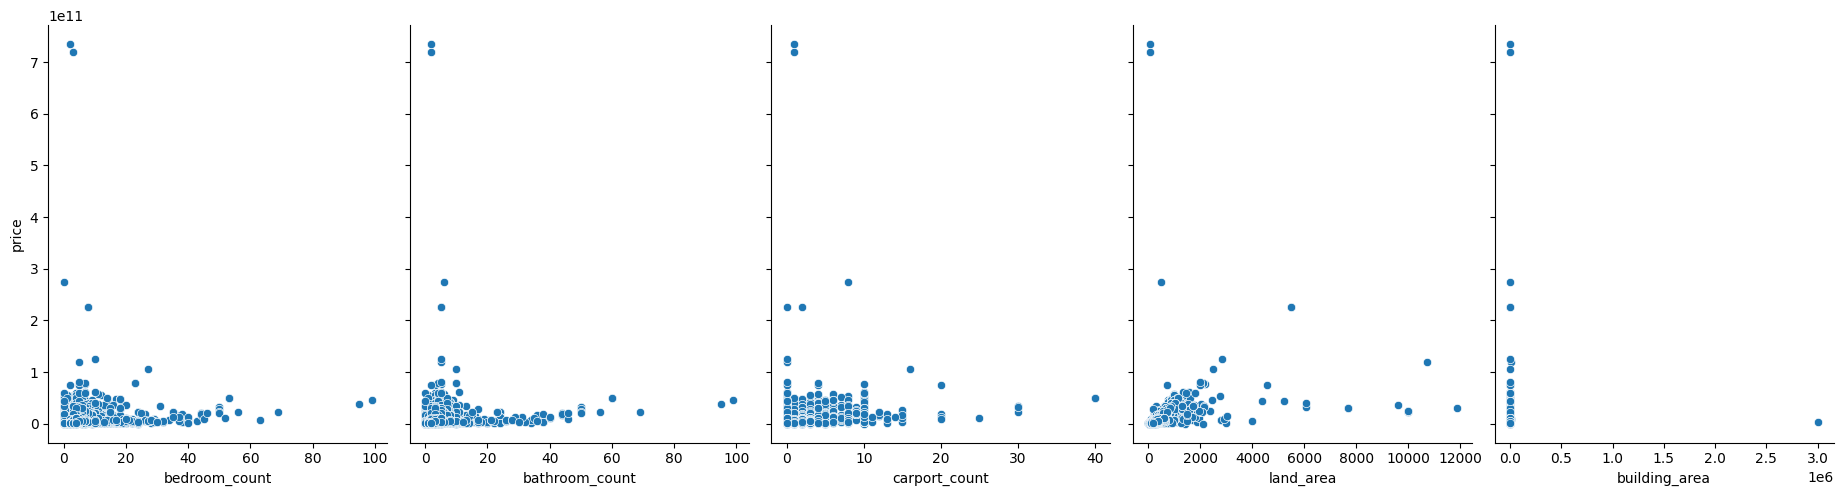

In [8]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area'], y_vars=['price'], height=5, aspect=0.75)
plt.show()

In [9]:
df.corr().style.background_gradient().format(precision=1)

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
bedroom_count,1.0,0.9,0.2,0.1,0.2,0.0
bathroom_count,0.9,1.0,0.2,0.1,0.2,0.0
carport_count,0.2,0.2,1.0,0.2,0.3,0.0
price,0.1,0.1,0.2,1.0,0.4,0.0
land_area,0.2,0.2,0.3,0.4,1.0,0.0
building_area,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
q11,q31=np.percentile(df['bedroom_count'], [25,75])
s1 = q31-q11
ba1 = q31+(1.5*s1)
bw1 = q11-(1.5*s1)
print(q11)
print(q31)
print(s1)
print(ba1)
print(bw1)

df = df[(df['bedroom_count'] >= bw1) & (df['bedroom_count'] <= ba1)]
df.info()

3.0
5.0
2.0
8.0
0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   7128 non-null   int64  
 1   bathroom_count  7128 non-null   int64  
 2   carport_count   7128 non-null   int64  
 3   price           7128 non-null   float64
 4   land_area       7128 non-null   int64  
 5   building_area   7128 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 389.8 KB


In [11]:
q12,q32=np.percentile(df['bathroom_count'], [25,75])
s2 = q32-q12
ba2 = q32+(1.5*s2)
bw2 = q12-(1.5*s2)
print(q12)
print(q32)
print(s2)
print(ba2)
print(bw2)

df = df[(df['bathroom_count'] >= bw2) & (df['bathroom_count'] <= ba2)]
df.info()

2.0
3.0
1.0
4.5
0.5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6466 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   6466 non-null   int64  
 1   bathroom_count  6466 non-null   int64  
 2   carport_count   6466 non-null   int64  
 3   price           6466 non-null   float64
 4   land_area       6466 non-null   int64  
 5   building_area   6466 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 353.6 KB


In [12]:
q13,q33=np.percentile(df['carport_count'], [25,75])
s3 = q33-q13
ba3 = q33+(1.5*s3)
bw3 = q13-(1.5*s3)
print(q13)
print(q33)
print(s3)
print(ba3)
print(bw3)

df = df[(df['carport_count'] >= bw3) & (df['carport_count'] <= ba3)]
df.info()

0.0
2.0
2.0
5.0
-3.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6353 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   6353 non-null   int64  
 1   bathroom_count  6353 non-null   int64  
 2   carport_count   6353 non-null   int64  
 3   price           6353 non-null   float64
 4   land_area       6353 non-null   int64  
 5   building_area   6353 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 347.4 KB


In [13]:
q14,q34=np.percentile(df['land_area'], [25,75])
s4 = q34-q14
ba4 = q34+(1.5*s4)
bw4 = q14-(1.5*s4)
print(q14)
print(q34)
print(s4)
print(ba4)
print(bw4)

df = df[(df['land_area'] >= bw4) & (df['land_area'] <= ba4)]
df.info()

97.0
260.0
163.0
504.5
-147.5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5900 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5900 non-null   int64  
 1   bathroom_count  5900 non-null   int64  
 2   carport_count   5900 non-null   int64  
 3   price           5900 non-null   float64
 4   land_area       5900 non-null   int64  
 5   building_area   5900 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 322.7 KB


In [14]:
q15,q35=np.percentile(df['building_area'], [25,75])
s5 = q35-q15
ba5 = q35+(1.5*s5)
bw5 = q15-(1.5*s5)
print(q15)
print(q35)
print(s5)
print(ba5)
print(bw5)

df = df[(df['building_area'] >= bw5) & (df['building_area'] <= ba5)]
df.info()

90.0
240.0
150.0
465.0
-135.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5703 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5703 non-null   int64  
 1   bathroom_count  5703 non-null   int64  
 2   carport_count   5703 non-null   int64  
 3   price           5703 non-null   float64
 4   land_area       5703 non-null   int64  
 5   building_area   5703 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 311.9 KB


In [15]:
q16,q36=np.percentile(df['price'], [25,75])
s6 = q36-q16
ba6 = q36+(1.5*s6)
bw6 = q16-(1.5*s6)
print(q16)
print(q36)
print(s6)
print(ba6)
print(bw6)

df = df[(df['price'] >= bw6) & (df['price'] <= ba6)]
df.info()

900000000.0
3000000000.0
2100000000.0
6150000000.0
-2250000000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5319 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5319 non-null   int64  
 1   bathroom_count  5319 non-null   int64  
 2   carport_count   5319 non-null   int64  
 3   price           5319 non-null   float64
 4   land_area       5319 non-null   int64  
 5   building_area   5319 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 290.9 KB


In [16]:
df.min()

bedroom_count            0.0
bathroom_count           1.0
carport_count            0.0
price             22000000.0
land_area                6.0
building_area            1.0
dtype: float64

In [17]:
df = df[(df['bedroom_count']>0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5281 non-null   int64  
 1   bathroom_count  5281 non-null   int64  
 2   carport_count   5281 non-null   int64  
 3   price           5281 non-null   float64
 4   land_area       5281 non-null   int64  
 5   building_area   5281 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 288.8 KB


In [18]:
df.min()

bedroom_count            1.0
bathroom_count           1.0
carport_count            0.0
price             22000000.0
land_area                6.0
building_area            1.0
dtype: float64

In [19]:
df = df[(df['building_area']>1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom_count   5279 non-null   int64  
 1   bathroom_count  5279 non-null   int64  
 2   carport_count   5279 non-null   int64  
 3   price           5279 non-null   float64
 4   land_area       5279 non-null   int64  
 5   building_area   5279 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 288.7 KB


In [20]:
df.min()

bedroom_count            1.0
bathroom_count           1.0
carport_count            0.0
price             22000000.0
land_area                6.0
building_area           18.0
dtype: float64

<Figure size 1000x800 with 0 Axes>

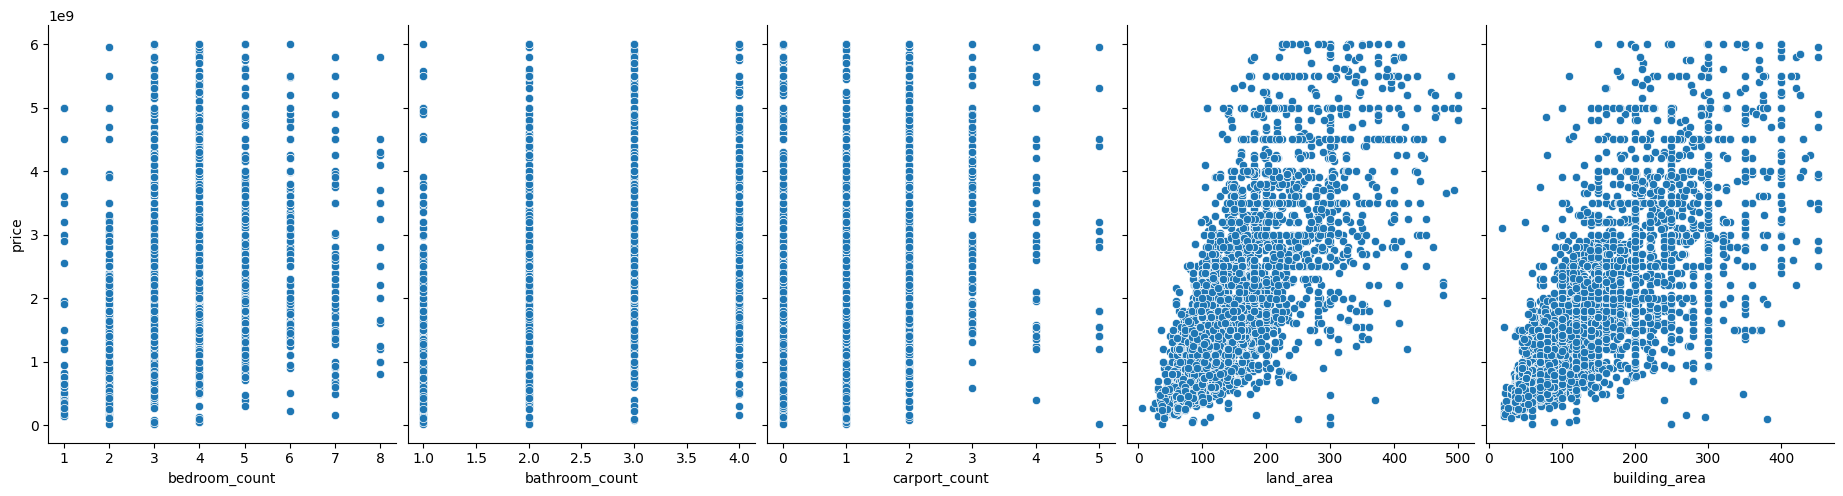

In [21]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area'], y_vars=['price'], height=5, aspect=0.75)
plt.show()

In [22]:
df.corr().style.background_gradient().format(precision=1)

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
bedroom_count,1.0,0.6,0.1,0.5,0.5,0.6
bathroom_count,0.6,1.0,0.2,0.6,0.4,0.6
carport_count,0.1,0.2,1.0,0.2,0.3,0.2
price,0.5,0.6,0.2,1.0,0.7,0.8
land_area,0.5,0.4,0.3,0.7,1.0,0.7
building_area,0.6,0.6,0.2,0.8,0.7,1.0


### Normalisasi data

In [23]:
scaler = MinMaxScaler()

fitur = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area']
target = 'price'

scaler_features = MinMaxScaler()
df[fitur] = scaler_features.fit_transform(df[fitur])

scaler_target = MinMaxScaler()
df[[target]] = scaler_target.fit_transform(df[[target]])

In [24]:
df.head()

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area
0,0.285714,0.333333,0.4,0.347608,0.265182,0.351852
1,0.285714,0.333333,0.6,0.682168,0.396761,0.652778
2,0.571429,0.333333,0.2,0.548344,0.696356,0.555556
3,0.142857,0.333333,0.2,0.093342,0.048583,0.143519
5,0.571429,0.666667,0.2,0.598528,0.360324,0.500000


### Train dan Validasi Model

In [25]:
x = df[fitur]
y = df[target]

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
def cross_validation_regression(x, y, model):
    y_pred = cross_val_predict(model, x, y, cv=5)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

In [28]:
mse_knn, mae_knn, r2_knn = cross_validation_regression(x, y, KNeighborsRegressor(n_neighbors=150))
mse_svr, mae_svr, r2_svr = cross_validation_regression(x, y, SVR(kernel='linear'))
mse_rf, mae_rf, r2_rf = cross_validation_regression(x, y, RandomForestRegressor(n_estimators=2000, random_state=42))

In [29]:
print("MSE KNN:", mse_knn)
print("MAE KNN:", mae_knn)
print("R2 KNN:", r2_knn)

print("MSE SVR:", mse_svr)
print("MAE SVR:", mae_svr)
print("R2 SVR:", r2_svr)

print("MSE RF:", mse_rf)
print("MAE RF:", mae_rf)
print("R2 RF:", r2_rf)

MSE KNN: 0.017998594396858174
MAE KNN: 0.09602486104202285
R2 KNN: 0.6393307245568545
MSE SVR: 0.016689174190204457
MAE SVR: 0.09229934099378863
R2 SVR: 0.6655698645014074
MSE RF: 0.018330251395624008
MAE RF: 0.09283909930254577
R2 RF: 0.6326847339420872


In [41]:
kfold = KFold(n_splits=10, shuffle=True)

fold = 1
meanR2 = []
meanMAE = []
meanMSE = []

for train, test in kfold.split(x,y):
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(
        loss = 'mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    print("Training k-fold ke-", fold)
    model.fit(
        x.iloc[train], y.iloc[train],
        batch_size=32,
        epochs=100,
        verbose=0
    )

    hasil = model.evaluate(x.iloc[test], y.iloc[test], verbose=0)
    y_pred = model.predict(x.iloc[test])
    r2 = r2_score(y.iloc[test], y_pred)
    print("MSE = ",hasil[0])
    print("MAE = ", hasil[1])
    print("R2 = ", r2*100, "%")

    meanMSE.append(hasil[0])
    meanMAE.append(hasil[1])
    meanR2.append(r2*100)

    fold += 1

Training k-fold ke- 1
17/17 [==============================] - 0s 686us/step
MSE =  0.01620686799287796
MAE =  0.09035146236419678
R2 =  68.70817162113391 %
Training k-fold ke- 2
17/17 [==============================] - 0s 1ms/step
MSE =  0.014874959364533424
MAE =  0.08601982891559601
R2 =  67.67583658246483 %
Training k-fold ke- 3
17/17 [==============================] - 0s 312us/step
MSE =  0.014651459641754627
MAE =  0.08795659244060516
R2 =  70.5213896658119 %
Training k-fold ke- 4
17/17 [==============================] - 0s 403us/step
MSE =  0.016199598088860512
MAE =  0.09120120853185654
R2 =  67.10030379772654 %
Training k-fold ke- 5
17/17 [==============================] - 0s 598us/step
MSE =  0.016864866018295288
MAE =  0.09243328869342804
R2 =  65.82395576008075 %
Training k-fold ke- 6
17/17 [==============================] - 0s 537us/step
MSE =  0.014242574572563171
MAE =  0.08608971536159515
R2 =  71.74261037404594 %
Training k-fold ke- 7
17/17 [===========================

In [42]:
totalMSE = 0
totalMAE = 0
totalR2 = 0

for i in range(len(meanR2)):
    totalR2 += meanR2[i]
    totalMSE += meanMSE[i]
    totalMAE += meanMAE[i]

totalR2/=len(meanR2)
totalMSE/=len(meanMSE)
totalMAE/=len(meanMAE)

print("rata rata R2 = ", totalR2, "%")
print("rata rata MSE = ", totalMSE)
print("rata rata MAE = ", totalMAE)

rata rata R2 =  69.1813367507211 %
rata rata MSE =  0.015348276402801276
rata rata MAE =  0.08845574781298637


In [43]:
model.save('modelANN.keras')

### Menggunakan Model untuk Prediksi Harga Rumah

In [46]:
def prediksi(data):
    data_prediksi = pd.DataFrame(data)
    data_prediksi_normalized = scaler_features.transform(data_prediksi[fitur])
    prediksi_normalized = model.predict(data_prediksi_normalized)

    prediksi = scaler_target.inverse_transform(prediksi_normalized)
    print(prediksi)
    return prediksi  

In [50]:
data = {'bedroom_count': [3],
        'bathroom_count': [2],
        'carport_count': [2],
        'land_area': [137],
        'building_area': [170]}

hasil_prediksi = prediksi(data).flatten()

1/1 [==============================] - 0s 58ms/step
[[2.1242337e+09]]
